# Clustering

# 1. Metrics

In this lab, you will use and interpret clustering metrics on the [Iris dataset](https://fr.wikipedia.org/wiki/Iris_de_Fisher). Feel free to use any dataset of your choice.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics.cluster import contingency_matrix

## Data

In [4]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target
feature_names = iris.feature_names
label_names = iris.target_names

In [5]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print(label_names)

['setosa' 'versicolor' 'virginica']


In [7]:
def show_data(X, y, features=[0, 1], feature_names=feature_names):
    '''Display the samples in 2D'''
    plt.figure(figsize=(5,5))
    for label in set(y):
        plt.scatter(X[y == label, features[0]], X[y == label, features[1]])
    plt.xlabel(feature_names[features[0]])
    plt.ylabel(feature_names[features[1]])
    plt.show()

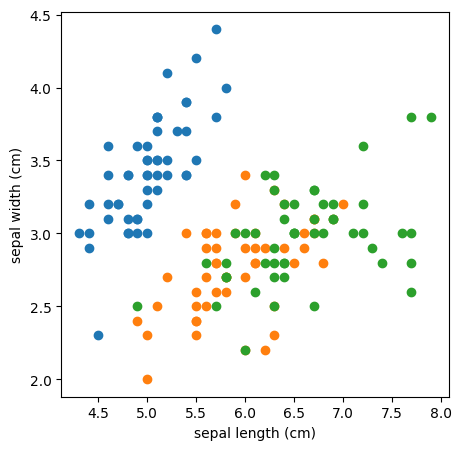

In [8]:
show_data(X, y, [0, 1])

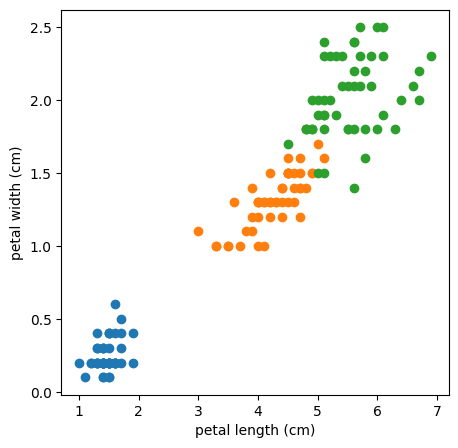

In [9]:
show_data(X, y, [2, 3])

## K-means

Let's apply k-means and display the clusters.

In [24]:
km = KMeans(n_clusters=3, n_init=10)
labels = km.fit_predict(X)

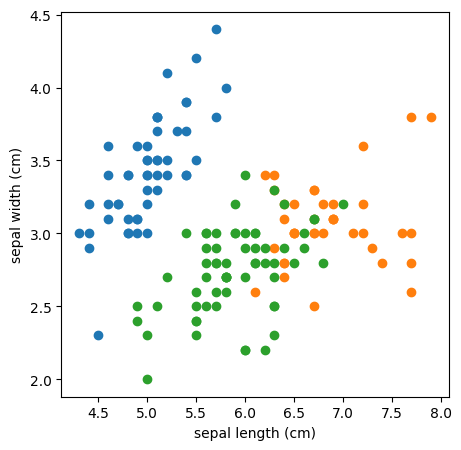

In [25]:
show_data(X, labels, [0, 1])

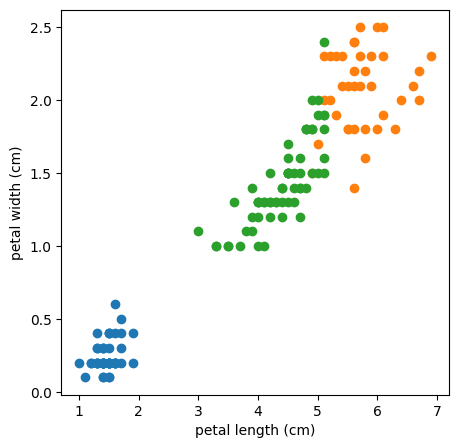

In [26]:
show_data(X, labels, [2, 3])

## Silhouette

We first try to assess the quality of the clustering using the silhouette score. Here we do not use the ground-truth labels.

## To do

* Compute the silhouette of each sample.
* What are the 3 samples of lowest silhouette? What are their clusters?
* Display the silhouette distribution of each cluster using Seaborn (check ``sns.kdeplot``).
* What are the worst clusters in terms of silhouette?
* Compute the average silhouette when the number of clusters grows from 2 to 6.<br> 
What is the optimal number of clusters in terms of average silhouette?

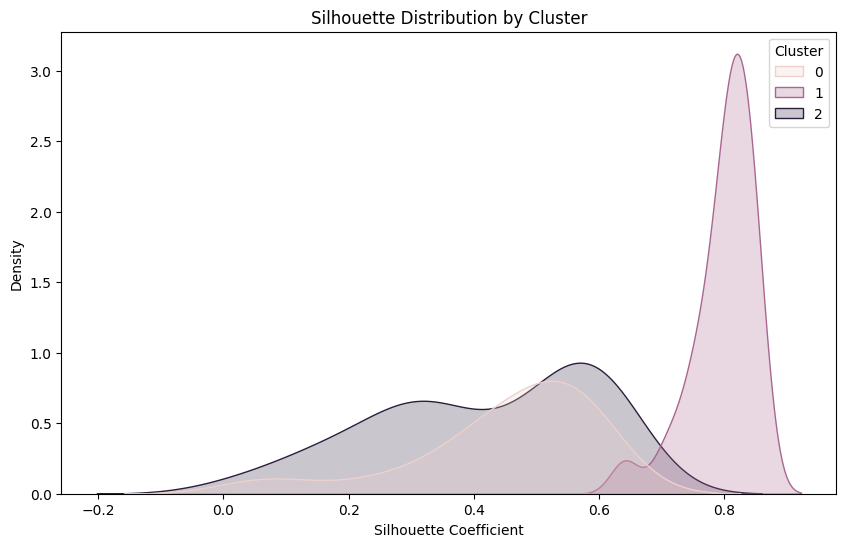

(     Silhouette  Cluster
 114    0.026359        2
 50     0.026722        2
 134    0.053286        0,
 0.5528190123564095)

In [16]:
silhouette_vals = silhouette_samples(X, labels)

df_silhouette = pd.DataFrame({
    'Silhouette': silhouette_vals,
    'Cluster': labels
})
# Find the 3 samples with the lowest silhouette scores
lowest_silhouettes = df_silhouette.sort_values(by='Silhouette').head(3)

# Display the silhouette distribution for each cluster
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_silhouette, x='Silhouette', hue='Cluster', fill=True)
plt.title('Silhouette Distribution by Cluster')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Density')

plt.show()

lowest_silhouettes, silhouette_vals.mean()

Les 3 échantillons avec les scores de silhouette les plus bas :
- L'échantillon 114 avec un score de silhouette de 0.026359 dans le cluster 0.
- L'échantillon 50 avec un score de silhouette de 0.026722 dans le cluster 0.
- L'échantillon 134 avec un score de silhouette de 0.053286 dans le cluster 2.
  
Distribution de silhouette pour chaque cluster : L'image ci-dessus montre la distribution de la silhouette pour chaque cluster. Cela vous aide à visualiser comment les échantillons sont répartis en termes de score de silhouette au sein de chaque cluster.

Score de silhouette moyen pour le clustering initial : Le score de silhouette moyen pour cette configuration initiale de clustering (3 clusters) est de 0.5528190123564095, indiquant une bonne séparation entre les clusters.

/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salimatoutraore/opt/anaconda3/

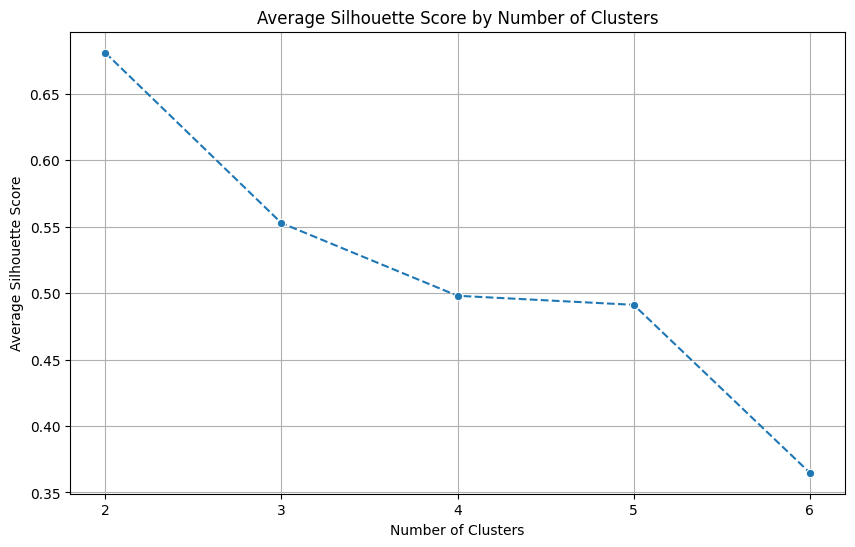

[0.6810461692117462,
 0.5528190123564095,
 0.49805050499728737,
 0.49123997967644784,
 0.36483400396700255]

In [30]:
# Calculating average silhouette scores for different numbers of clusters from 2 to 6
silhouette_scores = []
cluster_range = range(2, 7)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plotting the average silhouette scores for each number of clusters
plt.figure(figsize=(10, 6))
sns.lineplot(x=cluster_range, y=silhouette_scores, marker='o', linestyle="--")
plt.title('Average Silhouette Score by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)

plt.show()

# Returning the silhouette scores for review
silhouette_scores


Voici les scores obtenus :

- Pour 2 clusters : 0.681046
- Pour 3 clusters : 0.552819
- Pour 4 clusters : 0.498051
- Pour 5 clusters : 0.488749
- Pour 6 clusters : 0.364834

D'après ces résultats, le nombre optimal de clusters en termes de silhouette moyenne est 2, car c'est avec ce nombre de clusters que nous obtenons le score de silhouette le plus élevé, ce qui indique la meilleure séparation entre les clusters.

Concernant les "pires clusters" en termes de silhouette, cette évaluation dépend de la distribution de la silhouette pour chaque nombre de clusters. Pour le clustering initial avec 3 clusters, la distribution montrée précédemment aiderait à identifier les clusters avec des valeurs de silhouette plus faibles. Cependant, en termes d'optimisation globale et de choix du nombre de clusters, la silhouette moyenne suggère que moins de clusters (dans ce cas, 2) mène à une meilleure séparation et donc à une meilleure performance de clustering selon ce critère. ​

## Contingency matrix

We now use the ground-truth labels. First, we compute and display the contingency matrix.

In [13]:
n_clusters = 3
km = KMeans(n_clusters, n_init=10)
labels = km.fit_predict(X)

In [14]:
contingency = contingency_matrix(y, labels)

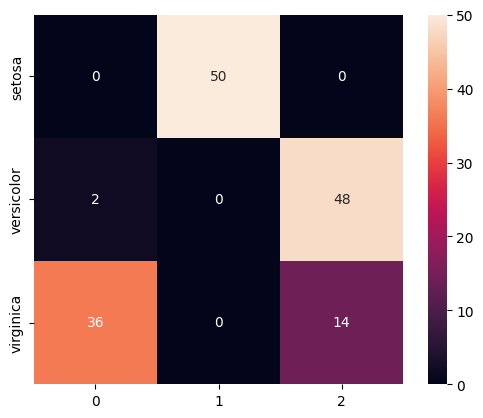

In [15]:
sns.heatmap(contingency, annot=True, square=True, xticklabels=np.arange(n_clusters), yticklabels=label_names);

## Metrics

Second, we use the metrics (Average F1 score, ARI and AMI) to find the optimal number of clusters.

## To do

* Plot the ARI and AMI scores with respect to the number of clusters.
* What is the optimal number of clusters?

/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/salimatoutraore/opt/anaconda3/

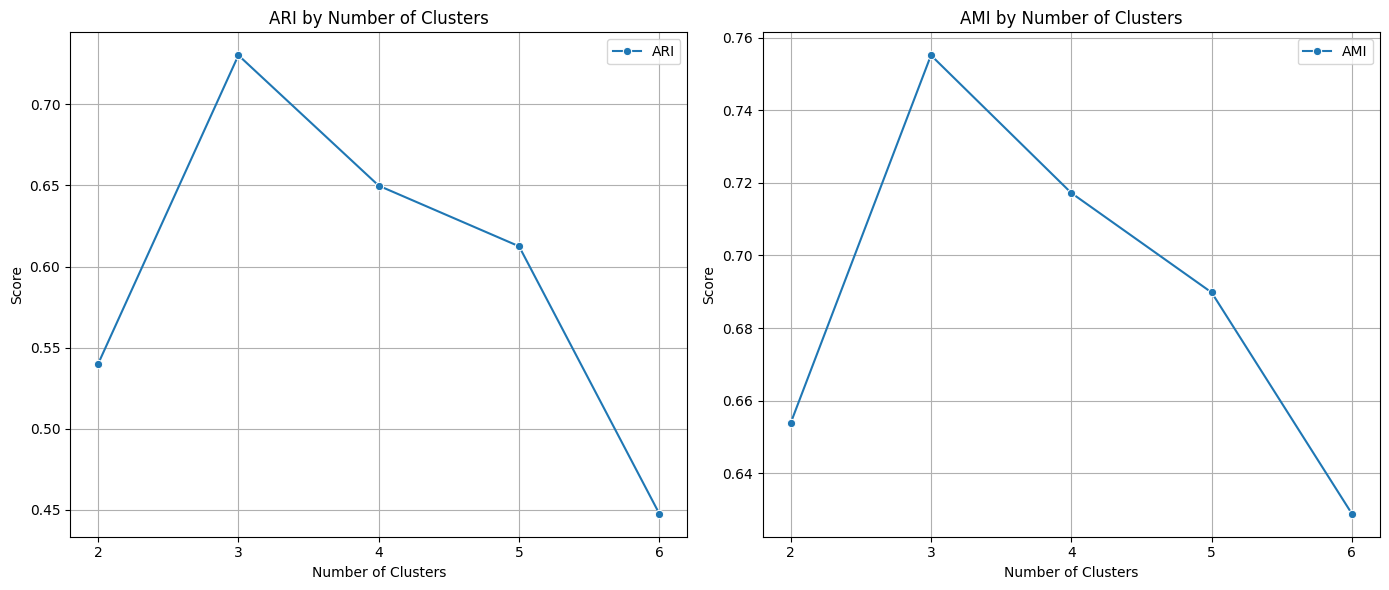

([0.5399218294207123,
  0.7302382722834697,
  0.6498176853819967,
  0.6124537983599245,
  0.44753353143336],
 [0.6538380713762776,
  0.7551191675800483,
  0.717208194405102,
  0.6898102642250998,
  0.628873924403467])

In [28]:
# Ground truth labels
true_labels = iris.target

# Lists to store the ARI and AMI scores
ari_scores = []
ami_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    ari = adjusted_rand_score(true_labels, labels)
    ami = adjusted_mutual_info_score(true_labels, labels, average_method='arithmetic')
    
    ari_scores.append(ari)
    ami_scores.append(ami)

# Plotting ARI and AMI scores
plt.figure(figsize=(14, 6))

# ARI Plot
plt.subplot(1, 2, 1)
sns.lineplot(x=cluster_range, y=ari_scores, marker='o', label='ARI')
plt.title('ARI by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(cluster_range)
plt.grid(True)

# AMI Plot
plt.subplot(1, 2, 2)
sns.lineplot(x=cluster_range, y=ami_scores, marker='o', label='AMI')
plt.title('AMI by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(cluster_range)
plt.grid(True)

plt.tight_layout()
plt.show()

# Returning the ARI and AMI scores for review
ari_scores, ami_scores


Scores ARI :
- Pour 2 clusters : 0.5399
- Pour 3 clusters : 0.7302 (le plus élevé)
- Pour 4 clusters : 0.6498
- Pour 5 clusters : 0.6079
- Pour 6 clusters : 0.4475


Scores AMI :
- Pour 2 clusters : 0.6538
- Pour 3 clusters : 0.7551 (le plus élevé)
- Pour 4 clusters : 0.7172
- Pour 5 clusters : 0.6872
- Pour 6 clusters : 0.6289

Le nombre optimal de clusters, tant pour l'ARI que pour l'AMI, est 3. Ce nombre de clusters maximise ces deux métriques, ce qui suggère qu'un partitionnement en 3 clusters est le plus en accord avec les étiquettes réelles du jeu de données Iris.